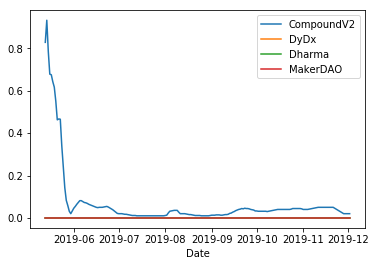

In [51]:
import numpy as np
import pandas as pd
import requests
import json
from datetime import datetime
import matplotlib.pyplot as plt

"""
Compares the interest rates for lenders on different tokens or platforms
"""

##Plataform ['CompoundV2', 'Dharma', 'MakerDAO']
platform = ['CompoundV2', 'DyDx', 'Dharma', 'MakerDAO']
##Token ['BAT', 'ETH', 'WBTC', 'ZRX', 'USDC']
token = 'ETH'
##Data
init_date = '2019-01-01'
timestamp = datetime.strptime(init_date, "%Y-%m-%d").timestamp()
timestamp = str(int(timestamp))

##Get data from API
data = pd.DataFrame()
for i in platform:
    url = 'https://api.loanscan.io/v1/interest-rates/historical/'+i+'?interestRateDomain=Supply&tokenSymbol='+token+'&intervalType=Day&startDateTimestamp='+timestamp+''
    headers = {'x-api-key': "FhBvufbZ3R6IpaPmN45LS2eEkI3Gahpw84gpeO1u"}
##Convert to .csv
    JSONContent = requests.get(url, headers = headers).json()
    pd.read_json(json.dumps(JSONContent)).to_csv(i+'.csv')
    i_data = pd.read_csv(i+'.csv', )#.set_index('date')
    data.at[:, i] = (i_data.iloc[:, -1] *100)
##Date
data['Date'] = pd.to_datetime(i_data['date']).dt.date
data = data.set_index('Date')
##Delete empty rows == 0
data = (data.loc[(data.iloc[:,0] != 0).idxmax():,:]).round(2)

#data
data.rolling(7).mean().plot()